<h2> es12: classification tasks, convolutional neural networks <h2>

<h5> 12-1: try training the model defined in LSN_Exercise_12 with different optimizers <h5>

first, we copy the code in LSN_Exercise12 in order to define the same example model:

In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples
an example of a data point with label 1 before to_categorical ...


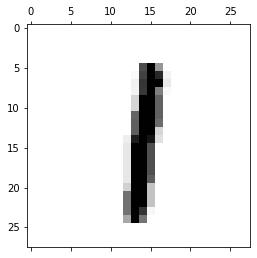

... and with label [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [2]:
from tensorflow.keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precision
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
nexample = 40
print('an example of a data point with label', Y_train[nexample], 'before to_categorical ...')
# matshow: display a matrix in a new figure window
plt.matshow(X_train[nexample,:].reshape(28,28),cmap='binary')
plt.show()


# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[nexample], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    print('Model architecture created successfully!')
    return model



In [4]:
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam, Ftrl

def compile_model( opt:keras.optimizers = SGD()):
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=opt,
                  metrics=['acc'])
    print('Model compiled successfully and ready to be trained.')
    return model



We try compiling the model with different optimizers: the "classical" SGD, Adam and RMSprop and the "exotic" Ftrl

In [5]:
from tensorflow.keras.models import load_model

histories = {}
earlystop = tf.keras.callbacks.EarlyStopping (monitor='val_loss', patience=0, min_delta = 0.01)

optdict = {"SGD" : SGD(), 
            "Adam" : Adam(), 
            "RMSprop" : RMSprop(), 
            "Ftrl" : Ftrl()
           }

for name, optimizer in optdict.items():
    # training parameters
    batch_size = 32
    epochs = 20

    # create the deep neural net
    model_DNN = compile_model( optimizer )

    # train DNN and store training info in histor(-ies)
    histories [name] = model_DNN.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(X_test, Y_test),
              callbacks=[earlystop]).history
    
    model_DNN.save ("model_" + name)

Model architecture created successfully!
Model compiled successfully and ready to be trained.
Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7280 - acc: 0.7885 - val_loss: 0.3028 - val_acc: 0.9176
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3727 - acc: 0.8941 - val_loss: 0.2340 - val_acc: 0.9324
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3016 - acc: 0.9159 - val_loss: 0.1969 - val_acc: 0.9421
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2598 - acc: 0.9275 - val_loss: 0.1722 - val_acc: 0.9479
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2301 - acc: 0.9351 - val_loss: 0.1572 - val_acc: 0.9503
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2070 - acc: 0.9418 - val_loss: 0.1430 - val_acc: 0.9542
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1882 - acc: 0.9470 - val

We plot accuracy and loss history

313/313 [==============================] - 1s 2ms/step - loss: 2.3021 - acc: 0.1135


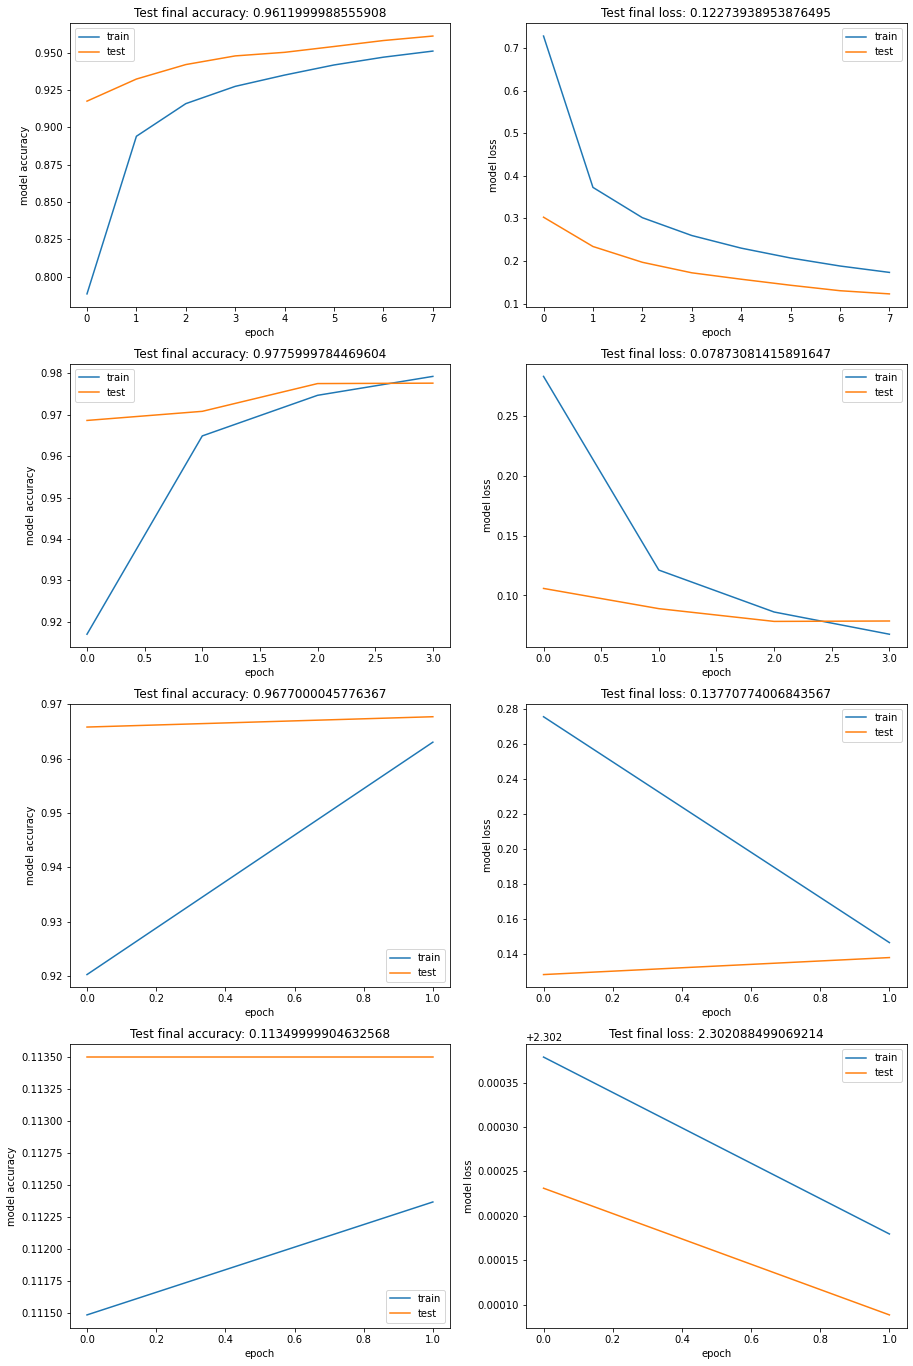

In [6]:
fig, axes = plt.subplots (len (optdict),2)
fig.set_size_inches (15, 6 * len (optdict))



for axx, (name, history) in zip (axes, histories.items()):
    #load saved model
    model_DNN = load_model ("model_" + name)
    
    # evaluate model
    score = model_DNN.evaluate(X_test, Y_test, verbose=1)

    # look into training history

    # summarize history for accuracy
    axx [0].plot(range ( len (history['acc'])), history['acc'])
    axx [0].plot(range ( len (history['val_acc'])),history['val_acc'])
    axx [0].set_ylabel('model accuracy')
    axx [0].set_xlabel('epoch')
    axx [0].set_title ('Test final accuracy: ' + str(score[1]))
    axx [0].legend(['train', 'test'], loc='best')

    # summarize history for loss
    axx [1].plot (range ( len (history['loss'])), history["loss"])
    axx [1].plot(range ( len (history['val_loss'])), history['val_loss'])
    axx [1].set_ylabel('model loss')
    axx [1].set_xlabel('epoch')
    axx [1].set_title ('Test final loss: ' +  str(score[0]))
    axx [1].legend(['train', 'test'], loc='best')


all optimizers can  do the job, a part from the last one. The one that achieves the best results under set conditions (earlystopping etc... ) is Adam, which also converges faster than SGD.

Now we plot predictions by the different models on the same set of test images

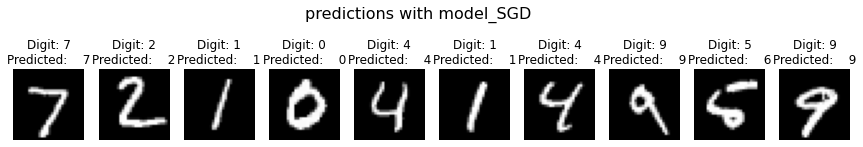

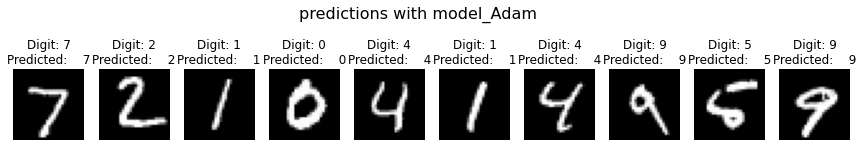

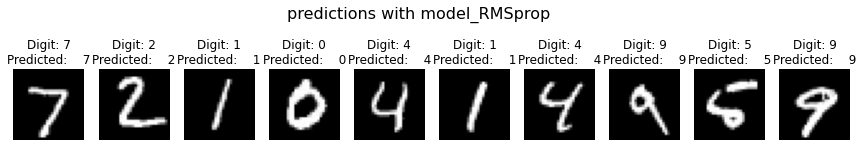

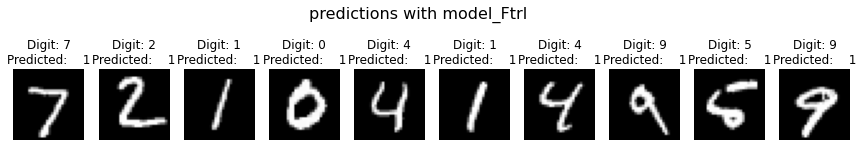

In [7]:
figs = []
for (name, opt) in optdict.items():
    #load model
    model_DNN = load_model ("model_" + name )
    
    #X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
    predictions = model_DNN.predict(X_test)

    X_test_for_plot = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

    figs.append (plt.figure(figsize=(15, 5)))
    figs [-1].suptitle ("predictions with model_" + name, fontsize=16)
    for i in range(10):    
        ax = plt.subplot(2, 10, i + 1)    
        plt.imshow(X_test_for_plot[i, :, :, 0], cmap='gray')    
        plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
        plt.axis('off') 

we can see that all models but the last one perform quite well. We also discovered why its performance is soo poor: training with a "follow the regularized leader" algorithm makes the model classify all input into the most frequent category (at present, 1). It is not the right algorithm for the task we aim to. Adam and RMSprop do slightly better than SGD, too (figure 5 is predicted to be 6 by the model trained with SGD ) 

<h5>12-2: create, train and evaluate a convolutional neural network for the same task as before<h5>

First, we use the code provided in LSN_Exercise12 to import training and test datasets

In [8]:
# you will need the following for Convolutional Neural Networks
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


Now we create a convolutional model. A layout similar to that presented in lesson 12 has been realized. After some sperimentation it was found that:
<ul>
    <li>increasing the size of the core for convolution too much damages predictions quality</li>
    <li>it is better to place dropout layer between layers with many nodes</li>
    <li>accuracy also suffers from a too much high dropout rate
</ul>
In the end, the model was designed as follows:  

In [15]:


def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(5, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    
    model.add (MaxPooling2D (pool_size=(3,3), strides=2 ))
    
    model.add (Conv2D (10, kernel_size=(5,5),
                       activation="relu" ))
    
    model.add (MaxPooling2D (pool_size=(3,3), strides=2))
    
    
    model.add (Flatten())
    
    model.add (Dropout (0.3))
    
    model.add (Dense(20, activation="relu" ))
    
    model.add (Dense (10, activation="softmax"))
    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='adam',
                  metrics=['acc'])
    print ("Model created succesfully and ready to be trained")
    return model

In [16]:
# training parameters
batch_size = 32
epochs = 5

# create the deep conv net
model_CNN=create_CNN()

# train CNN
model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaliate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model created succesfully and ready to be trained
Epoch 1/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.4843 - acc: 0.8408 - val_loss: 0.1098 - val_acc: 0.9683
Epoch 2/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1920 - acc: 0.9404 - val_loss: 0.0840 - val_acc: 0.9746
Epoch 3/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1514 - acc: 0.9530 - val_loss: 0.0697 - val_acc: 0.9775
Epoch 4/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1293 - acc: 0.9599 - val_loss: 0.0668 - val_acc: 0.9799
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0632 - acc: 0.9807

Test loss: 0.06315223127603531
Test accuracy: 0.9807000160217285


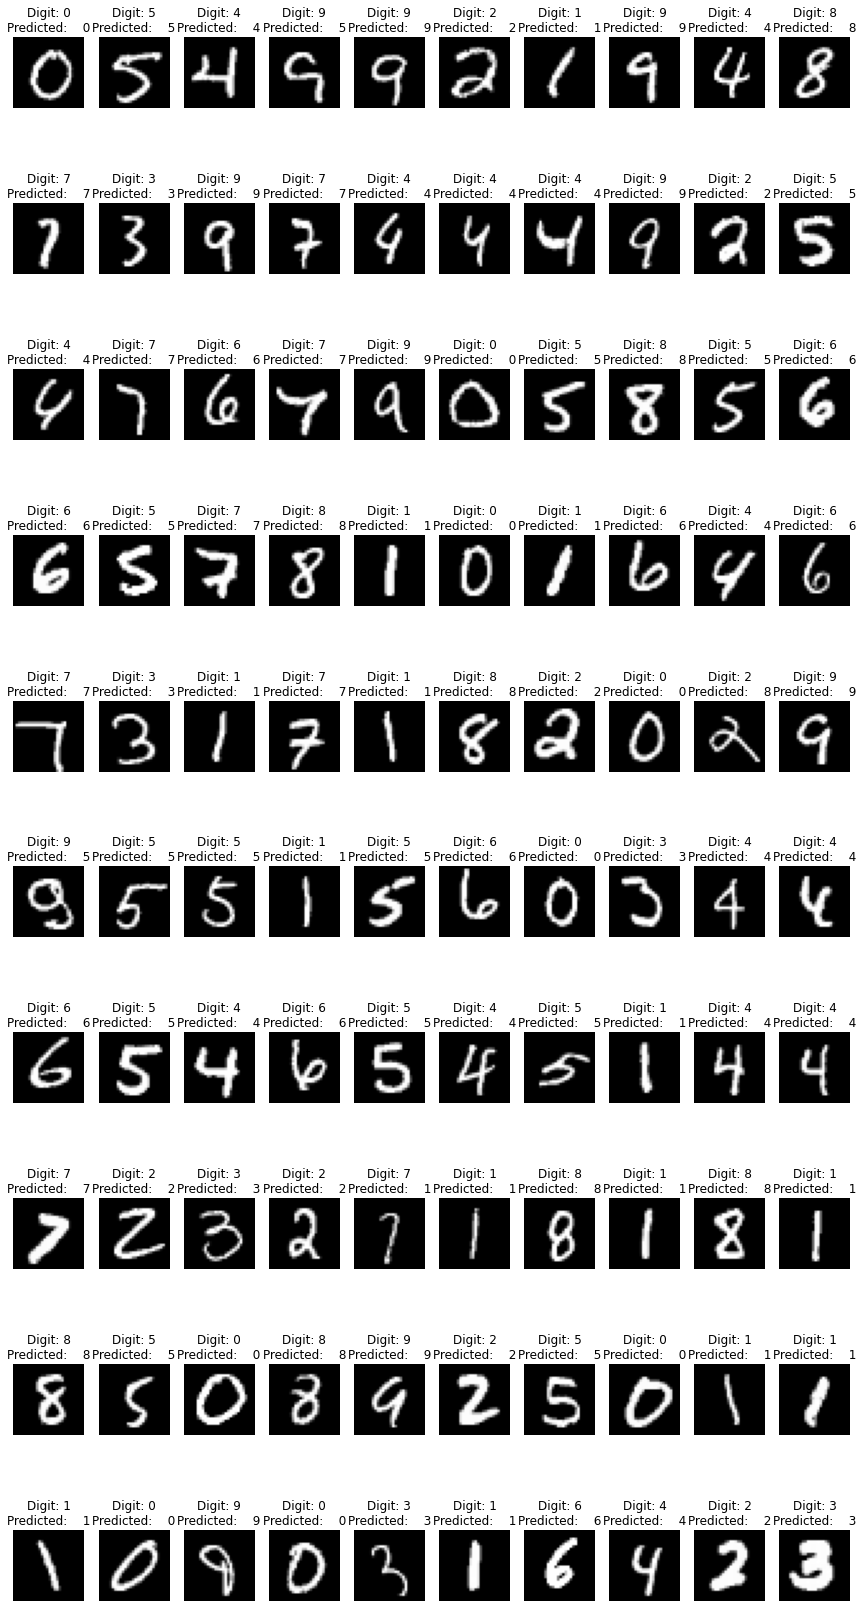

In [11]:
predictions = model_CNN.predict(X_test)

X_test_for_plot = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)


nrows = 10
ncols = 10
offset = 100
plt.figure(figsize=(15, nrows * 3. ))
for i in range (nrows):
    for j in range(ncols):    
        indfig = i * ncols + j + 1
        inddata = indfig + offset
        ax = plt.subplot(nrows, ncols, indfig)    
        plt.imshow(X_test_for_plot [inddata , :, :, 0], cmap='gray')    
        plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[inddata]), np.argmax(predictions[inddata])))    
        plt.axis('off') 


The model performs quite well with the default test dataset; however, it is not perfect: it can be seen that, out of the 100 presented digits, two are predicted wrong (fourth of first line and first of sixth line)

<h5>12-3: try to have the model recognise your own handwritten digits <h5>

We use the same model already trained above

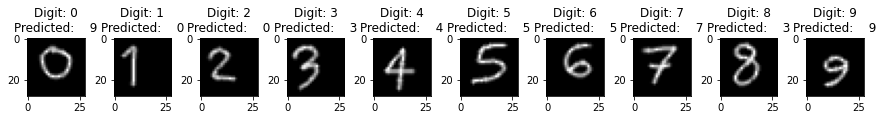

In [17]:
from PIL import Image
import os

plt.figure(figsize=(15,5))
plt.subplots_adjust (wspace=0.5)


for ifigure in range (10):
    digit_filename = "./handwritten_figures/figure_" + str(ifigure) + ".png"
    digit_in = Image.open(digit_filename).convert('L')
    #digit_in = Image.open("8b.png").convert('L') #ON GOOGLE COLAB INSERT THE NAME OF THE UPLOADED FILE

    ydim, xdim = digit_in.size
    #print("Image size: "+str(xdim)+"x"+str(ydim))
    pix=digit_in.load();
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]

    data /= 255

    ax = plt.subplot (1,10,ifigure +1)
    plt.imshow(data, cmap='gray')

    data = data.reshape (1,28,28,1)
    
    p = model_CNN.predict (data)
    ax.set_title ("Digit: {}\nPredicted:    {}".format( ifigure, np.argmax(p)))
    

It may be noticed that, by getting images from a different "database", prediction efficiency decreases : two digits out of 10 are wrongly predicted. This may be mended by applying some geometric tranformation to the training dataset.